# 제 6장. 머신러닝 - 지도학습

## 제 1절. 단순 선형 회귀
단순한 직선, 즉 선형으로 함수를 만들어 예측하는 알고리즘이다. <br><br>

### 1. 정규방정식
선형회귀는 1차 방정식의 형태를 가지고 있다. 즉 계수와 절편을 가지고 있어서, 최적의 계수와 절편을 찾으면, 회귀함수가 생성되는 것이다.


예를 들어보면, <br> 

$ 연봉 = b_1 * 실력 + b_0 $ <br>

$ b_1 (계수), b_0 (절편) $ 은 선형 모델의 파라미터가 되고, 실력은 입력 특성 (독립 변수), 연봉은 맞추고자 하는 타켓값, 즉 종속변수가 된다. 
(1) scikit-learn의 LinearRegression

* [Medical Cost Personal Dataset 바로가기](https://www.kaggle.com/datasets/mirichoi0218/insurance)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data = pd.read_csv('./data/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


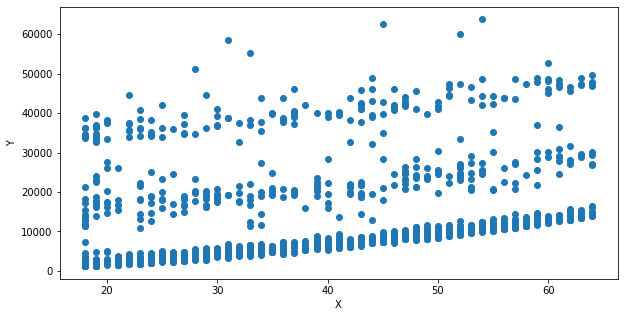

In [2]:
x=data['age']
y=data['charges']

plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

1개의 설명변수 (age)로 종속변수 ('charges') 예측

In [3]:
x=np.array(data['age'])
y=np.array(data['charges'])
x=x.reshape(-1 ,1) 
# .reshape()으로 차원 맞추기
y=y.reshape(-1 ,1)
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [8]:
print('선형 회귀 모델 결과')
print('절편', lr.intercept_, '계수', lr.coef_) 
# 절편이 엄청 큼!

선형 회귀 모델 결과
절편 [3165.88500606] 계수 [[257.72261867]]


In [9]:
print(lr.score(x,y))

0.08940589967885804


In [10]:
x_new=[[19],[64]] # 19세, 64세의 병원비는 어떨까
y_hat=lr.predict(x_new)
print(y_hat) # 8062원, 19660원으로 예측함

[[ 8062.61476073]
 [19660.13260074]]


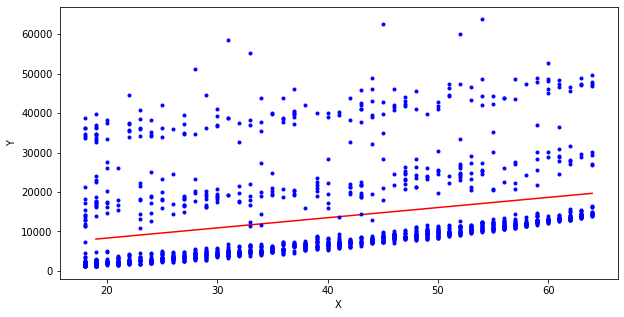

In [11]:
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, '-r') # 회귀 직선 그리기 r = red 
plt.plot(x, y, '.b') # 샘플 스케터 그리기 b = blue 
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 2. 경사하강법
최소 함수값을 갖을 때까지, 독립변수의 값을 바꿔가며 함수값을 낮춰가는 방법을 경사하강법이라고 한다. 


(1) scikit-learn의 SGDRegressor  

In [12]:
# 경사하강법을 구현해보자
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor 

data= pd.read_csv('./data/insurance.csv')
x=np.array(data['age'])
y=np.array(data['charges'])

x = x.reshape(-1,1) 

sgd_reg =SGDRegressor(max_iter=1000, random_state=34) 
sgd_reg.fit(x,y)

SGDRegressor(random_state=34)

In [13]:
print('SGD 회귀 모델 결과')
print('절편', sgd_reg.intercept_, '계수', sgd_reg.coef_)
print(f"정확도 : {sgd_reg.score(x,y)}") 
# 절편이 높아서, 회귀선보다 하단의 데이터 많음

SGD 회귀 모델 결과
절편 [6159.33896623] 계수 [89.07735599]
정확도 : -0.03823321520978418


In [14]:
x_new=[[19],[64]] # 19세는 1.8만원, 64세는 4만원 정도로 예상
y_hat=sgd_reg.predict(x_new)
print(y_hat)

[ 7851.80873008 11860.28974972]


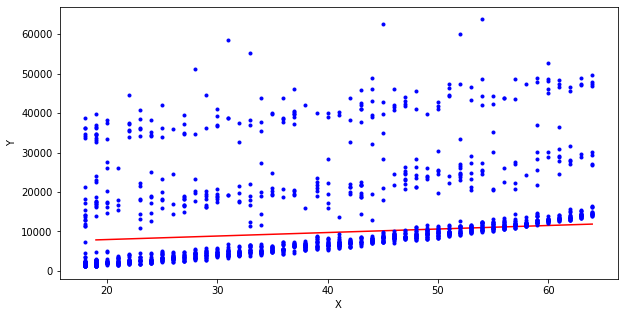

In [15]:
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, '-r')
plt.plot(x, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


## 제 2절. 다항 회귀
데이터가 단순한 직선 형태가 아닌 비선형의 형태를 갖고 있을 때, <b>각 변수의 거듭제곱을 새로운 변수로 추가</b>하면 선형 모델을 사용할 수 있다. 이런 확장한 특성을 데이터세트에 훈련시키는 기법을 다항 회귀(Polynominal Regression)이라고 한다.

### 1. 단순 다항 회귀분석
설명변수를 한개만 선택하여, 다항식을 적용한 모델을 만들어보자!

* [80 Cereals 바로가기](https://www.kaggle.com/datasets/crawford/80-cereals)

80가지 시리얼의 영양소를 평가하기 위한 데이터임, 즉 설탕, 프로틴... 등 함유량에 따라 영양등급(rating) 평가하는 데이터 임 <br>


In [25]:
import pandas as pd
cereal = pd.read_csv('./data/cereal.csv')
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [26]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [27]:
cereal = cereal[cereal.columns[3:]] # name, mfr, type 제거 (씨잘데기 없는거~)
cereal = cereal[cereal.sugars >=0] # 설탕함유량 0이상만 추출
cereal.head()


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


/home/restful3/anaconda3/envs/trading/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


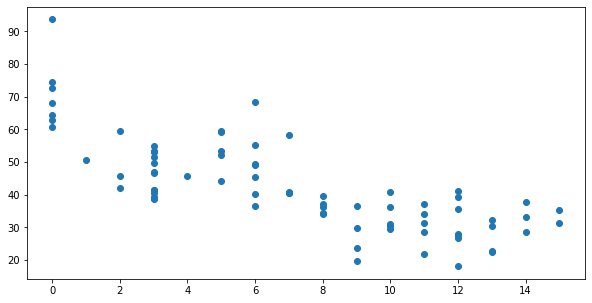

In [28]:
# 설탕함유량(X)에 따른 영양등급평가(y)를 회귀분석으로 예측해본다.
import matplotlib.pyplot as plt
cereal2 = cereal[['sugars', 'rating']] 
cereal2.sort_values(by='sugars', inplace =True) # 설탕 오름차순 정렬
cereal2.reset_index(drop=True, inplace =True) # 오름차순 리인덱싱
x=cereal2['sugars'].values #설탕함유량 넘파이화
y=cereal2['rating'].values #영양평가등급 넘파이화
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.show();
# 스케터 해보니, 약간 곡선 형태의 회귀식을 적용해주고 싶음

In [44]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state =1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2) # 곡선화 해주고 싶어서 2차항 인스턴스 생성
X_poly=poly_reg.fit_transform(X_train.reshape(-1,1)) # X 변수에 적용

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [46]:
import numpy as np
X_test_poly=poly_reg.transform(X_test.reshape(-1,1))
pred=reg.predict(X_test_poly)

np.set_printoptions(precision=2) # 소수점 둘째자리까지 표현
print(np.concatenate((pred.reshape(len(pred),1), y_test.reshape(len(y_test),1)),1))
# 예측, 결과 비교

[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]


In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test.reshape(-1,1)), y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	33.565
MAE	4.606
RMSE	5.794
ACC	74.376%


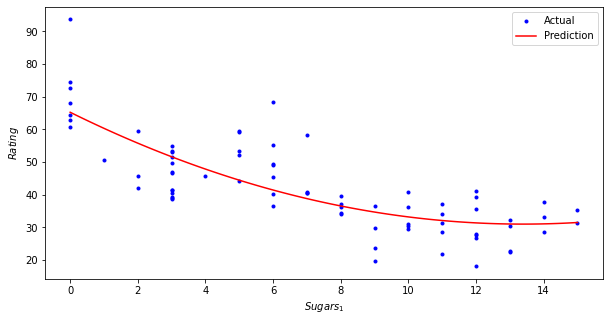

In [48]:
plt.figure(figsize=(10,5))

# poly_reg = PolynomialFeatures(degree=2) # 곡선화 해주고 싶어서 2차항 인스턴스 생성 
X_new = np.linspace(0,15,100).reshape(100,-1) # 0~15 사이의 100개 값 생성
X_new_poly = poly_reg.transform(X_new) # X_new에 2차항 인스턴스 적용
y_new = reg.predict(X_new_poly) # 이미 학습된 모델에 다항회귀분석 통한 예측

plt.plot(x, y, 'b.', label ='Actual') # 샘플값 파랑스케터
plt.plot(X_new, y_new, 'r-', label ='Prediction') # 빨강 회귀선
plt.legend(loc='upper right')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Rating$')
plt.show()


### 고차 다항 회귀분석
동일한 시리얼 영양소 평가데이터로, 설명변수를 12개 데이터로 설정하여 다항회귀 분석을 수행해보자

In [49]:
cereal.info() # 타겟이 될 rating은 12개 변수 중 마지막인 12번, 즉 iloc[:,-1]이나 iloc[:,12]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 76
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calories  76 non-null     int64  
 1   protein   76 non-null     int64  
 2   fat       76 non-null     int64  
 3   sodium    76 non-null     int64  
 4   fiber     76 non-null     float64
 5   carbo     76 non-null     float64
 6   sugars    76 non-null     int64  
 7   potass    76 non-null     int64  
 8   vitamins  76 non-null     int64  
 9   shelf     76 non-null     int64  
 10  weight    76 non-null     float64
 11  cups      76 non-null     float64
 12  rating    76 non-null     float64
dtypes: float64(5), int64(8)
memory usage: 8.3 KB


In [50]:
# 데이터 분할
X = cereal.iloc[:,:-1].values # 종속변수 전까지 선택하여 넘파이화
y = cereal.iloc[:,-1].values # 종속변수만 선택

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, 
random_state =1)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53, 12) (23, 12) (53,) (23,)


In [53]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

from sklearn.linear_model import LinearRegression
X_poly = poly_reg.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [54]:
import numpy as np
X_test_poly = poly_reg.transform(X_test)
pred = reg.predict(X_test_poly)

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test), y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	9.117
MAE	2.102
RMSE	3.019
ACC	93.008%


## 제 3절 다중회귀
다중의 독립변수가 있는 회귀분석을 말한다. 모델이 적합해져서 과대적합이 발생할 수도 있기 때문에, 릿지 / 라소 / 엘라스틱넷 등의 규제를 적용하거나, 변수선택법 (전진/후진/단계별)을 활용하여 모델을 최적화한다.

### 릿지 (Ridge)
최소제곱 적합식의 수축패널티라 불리는 항에 L2패널티를 적용한 것. <br>
릿지계수인 알파값이 증가될수록 편향은 증가하지만 분산이 감소하여, 학습데이터의 작은 변화에 회귀계수 추정치가 크게 변하는 문제를 극복할 수 있다.

In [56]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

[np.hstack 및 concatrate 공부하기](https://everyday-image-processing.tistory.com/m/87)

In [57]:
# 릿지계수인 알파값의 변화에 따라 각 변수의 회귀계수 변화를 확인해보자
from sklearn.linear_model import Ridge

alpha = np.logspace(-3, 1, 5)

data=[]
for i, a in enumerate(alpha):
    ridge=Ridge(alpha=a)
    ridge.fit(x, y)
    data.append(pd.Series(np.hstack([ridge.coef_]))) # ela모델의 계수를 hstack으로 벡터생성후 시리즈 변환하여 담기

df_ridge=pd.DataFrame(data, index=alpha)
df_ridge.columns=x.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.551414,-239.090354,520.363367,323.828627,-712.328205,413.383794,65.811629,167.513774,720.944468,68.122100
0.010,-7.199457,-234.552930,520.583136,320.523356,-380.607066,150.483752,-78.591232,130.313059,592.349587,71.133768
0.100,1.307349,-207.194814,489.691080,301.769437,-83.466074,-70.828096,-188.680164,115.712703,443.814054,86.748539
1.000,29.465746,-83.154885,306.351627,201.629434,5.909369,-29.515927,-152.040465,117.311715,262.944995,111.878718
10.000,19.812822,-0.918458,75.416167,55.025419,19.924600,13.948686,-47.553816,48.259420,70.144068,44.213876


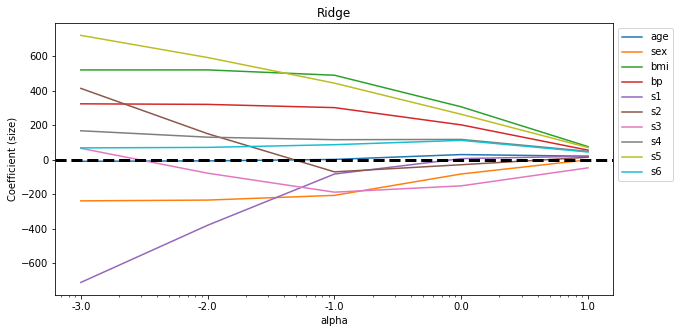

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.semilogx(df_ridge)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1, 1))
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

알파가 증가하며 다수의 회귀계수가 비슷하게 0에 수렴하는 것을 확인

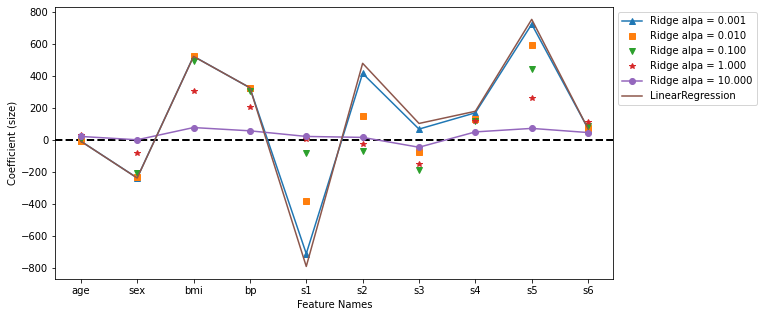

In [85]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x,y)

plt.figure(figsize=(10,5))
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ridge.loc[0.001], '^-', label='Ridge alpa = 0.001')
plt.plot(df_ridge.loc[0.010], 's', label='Ridge alpa = 0.010')
plt.plot(df_ridge.loc[0.100], 'v', label='Ridge alpa = 0.100')
plt.plot(df_ridge.loc[1.000], '*', label='Ridge alpa = 1.000')
plt.plot(df_ridge.loc[10.000], 'o-', label='Ridge alpa = 10.000')

plt.plot(lr.coef_,label='LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1));

### 라쏘  
최소제곱 적합식의 수축패널티라 불리는 항에 L1패널티를 적용한 것. <br>
L1패널티는 알파가 충분히 클 때 계수추정치의 일부를 0이 되도록 해줌<br>: 덜 중요한 특징의 가중치를 제거할 수 있다는 점에서 릿지회귀와 차이

In [86]:
from sklearn.linear_model import Lasso

alpha=np.logspace(-3, 1, 5)

data=[]
for i, a in enumerate(alpha):
    lasso=Lasso(alpha=a)
    lasso.fit(x, y)
    data.append(pd.Series(np.hstack([lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha)
df_lasso.columns=x.columns
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.996177,-238.896328,520.267403,323.423596,-720.244828,421.399753,66.733503,164.448022,725.335558,67.476810
0.010,-1.304662,-228.819129,525.566130,316.168834,-307.016211,89.324647,-105.078369,119.597616,571.330356,65.008383
0.100,-0.000000,-155.359976,517.186795,275.077235,-52.539365,-0.000000,-210.157991,0.000000,483.912648,33.673965
1.000,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.000000,307.605418,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


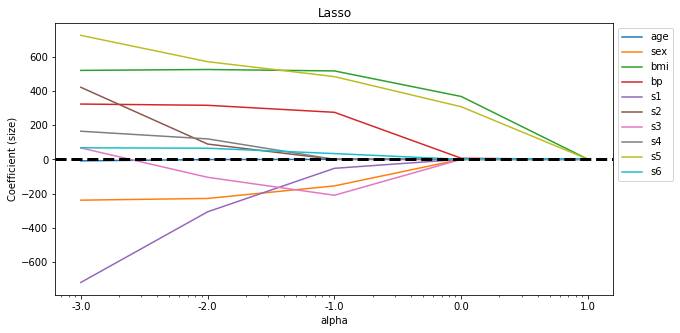

In [88]:
plt.figure(figsize=(10,5))
plt.semilogx(df_lasso)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_lasso.columns, bbox_to_anchor=(1, 1))
plt.title('Lasso')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3);

알파값이 증가하며, 일부 회귀계수가 0으로 먼저 수렴하는 것 확인

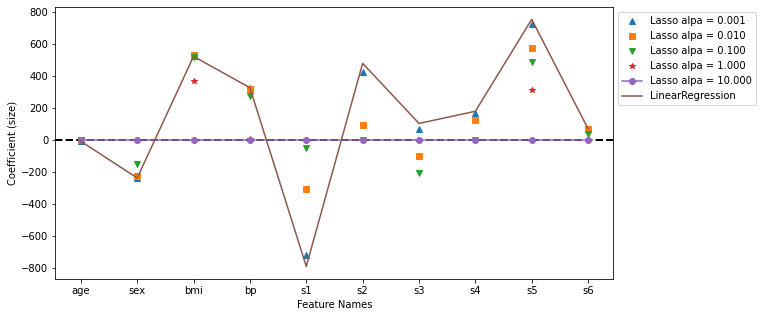

In [90]:
plt.figure(figsize=(10,5))
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_lasso.loc[0.001], '^', label='Lasso alpa = 0.001')
plt.plot(df_lasso.loc[0.010], 's', label='Lasso alpa = 0.010')
plt.plot(df_lasso.loc[0.100], 'v', label='Lasso alpa = 0.100')
plt.plot(df_lasso.loc[1.000], '*', label='Lasso alpa = 1.000')
plt.plot(df_lasso.loc[10.000], 'o-', label='Lasso alpa = 10.000')
plt.plot(lr.coef_,label='LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1));

알파가 작을수록 기본회귀식과 비슷한 값, 클수록 분산 감소시켜서 평균과 가까운값

###  엘라스틱넷  
릿지 회귀와 라쏘회귀를 절충한 알고리즘으로, 혼합비중 r을 사용하여 r이 0에 가까울수록 릿지에, r이 1에 가까울수록 라소에 회귀한다.

In [91]:
from sklearn.linear_model import ElasticNet

alpha = np.logspace(-3, 1, 5)

data=[]
for i, a in enumerate(alpha):
    ela=ElasticNet(alpha=a, l1_ratio=0.5) #r을 0.5로 설정
    ela.fit(x, y)
    data.append(pd.Series(np.hstack([ela.coef_]))) 

df_ela=pd.DataFrame(data, index=alpha)
df_ela.columns=x.columns
df_ela

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.706329,-178.074465,450.884335,281.068431,-44.049705,-77.943898,-188.957481,119.794399,393.702359,98.944302
0.010,33.147367,-35.245354,211.024367,144.559236,21.931722,0.000000,-115.619973,100.658917,185.325911,96.257335
0.100,10.286332,0.285983,37.464655,27.544765,11.108856,8.355892,-24.120809,25.505492,35.465700,22.894985
1.000,0.359018,0.000000,3.259767,2.204340,0.528646,0.250935,-1.861363,2.114454,3.105835,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


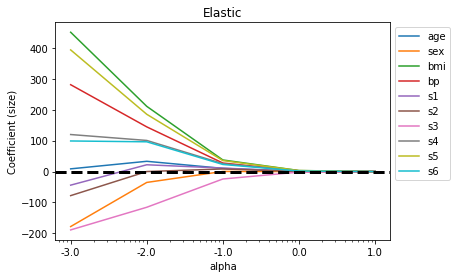

In [33]:
plt.semilogx(df_ela)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ela.columns, bbox_to_anchor=(1, 1))
plt.title('Elastic')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

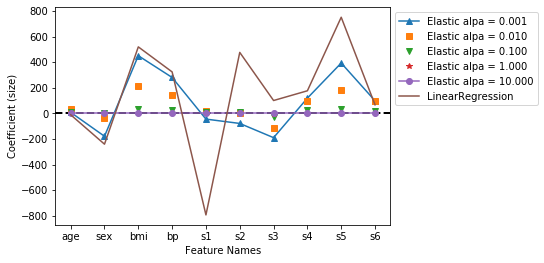

In [34]:
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ela.loc[0.001], '^-', label='Elastic alpa = 0.001')
plt.plot(df_ela.loc[0.010], 's', label='Elastic alpa = 0.010')
plt.plot(df_ela.loc[0.100], 'v', label='Elastic alpa = 0.100')
plt.plot(df_ela.loc[1.000], '*', label='Elastic alpa = 1.000')
plt.plot(df_ela.loc[10.000], 'o-', label='Elastic alpa = 10.000')
plt.plot(lr.coef_,label='LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))

제 4절 로지스틱 회귀

1. 로지스틱 회귀  
(1) scikiet-learn의 LogisticRegression

* 코드 실습  
데이터 : https://www.kaggle.com/datasets/kukuroo3/body-performance-data

In [62]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

body=pd.read_csv('./data/bodyPerformance.csv')
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [63]:
body['gender']=np.where(body['gender']=='M', 0, 1)
body['class_1']=np.where(body['class']=='A', 1, 0)
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [64]:
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class', 'class_1']))
x=body[feature_columns]
y=body['class_1']

train_x, test_x, train_y, test_y=train_test_split(x,y,stratify=y, train_size=0.7, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [65]:
from sklearn.linear_model import LogisticRegression
logR=LogisticRegression()
logR.fit(train_x, train_y)

LogisticRegression()

In [66]:
proba=pd.DataFrame(logR.predict_proba(train_x))
cs=logR.decision_function(train_x)

df=pd.concat([proba, pd.DataFrame(cs)], axis=1)
df.columns=['Not A','A', 'decision_function']

df.sort_values(['decision_function'], inplace=True)
df.reset_index(inplace=True, drop=True)

df

,Not A,A,decision_function
0,1.000000,9.597743e-09,-18.461738
1,1.000000,4.460468e-08,-16.925427
2,1.000000,4.834140e-08,-16.844978
3,1.000000,4.866258e-08,-16.838355
4,1.000000,7.877641e-08,-16.356652
...,...,...,...
9370,0.001709,9.982908e-01,6.369998
9371,0.001616,9.983842e-01,6.426334
9372,0.001423,9.985768e-01,6.553453
9373,0.000603,9.993965e-01,7.412201


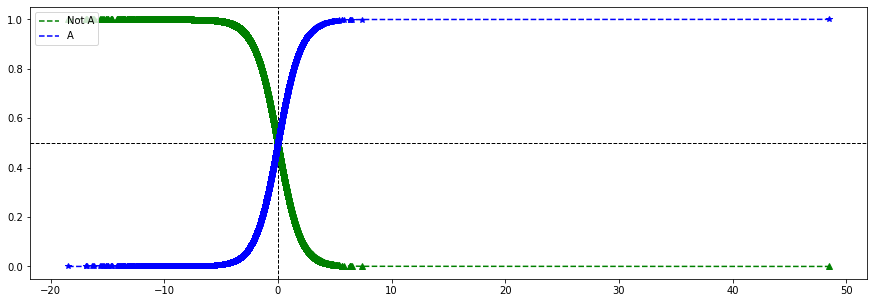

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1)
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)

plt.plot(df['decision_function'], df['Not A'], 'g--', label='Not A')
plt.plot(df['decision_function'], df['Not A'], 'g^')
plt.plot(df['decision_function'], df['A'], 'b--', label='A')
plt.plot(df['decision_function'], df['A'], 'b*')

plt.xlabel
plt.ylabel

plt.legend(loc='upper left')

plt.show()

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred=logR.predict(test_x)

test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y, pred)
test_rcll=recall_score(test_y, pred)
test_f1=f1_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[2763  251]
 [ 344  660]]


정확도	85.19%
정밀도	72.45%
재현율	65.74%
F1	68.93%


In [73]:
# !pip install scikit-plot

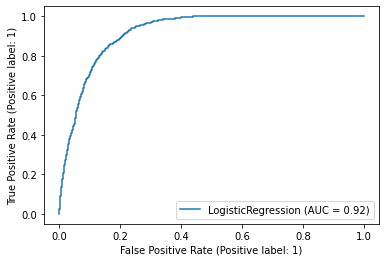

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logR, test_x, test_y)
plt.show()

2. 소프트맥스 회귀  
(1) scikit-learn의 LogisticRegression의 매개변수 활용

* 코드 실습

In [77]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
body = pd.read_csv('./data/bodyPerformance.csv')
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [78]:
# gender 변수 전처리
body['gender']=np.where(body['gender']=='M', 0, 1)
# class 변수 전처리
mapping={'A':0, 'B':1, 'C':2, 'D':4}
body['class_2']=body['class'].map(mapping)

body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_2
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,4
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,4


In [79]:
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class', 'class_2']))
x=body[feature_columns]
y=body['class_2']

train_x, test_x, train_y, test_y = train_test_split(x,y,stratify=y, train_size=0.7, random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [81]:
y.value_counts()

2    3349
4    3349
0    3348
1    3347
Name: class_2, dtype: int64

In [82]:
from sklearn.linear_model import LogisticRegression

softm=LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softm.fit(train_x, train_y)

LogisticRegression(C=10, multi_class='multinomial')

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred=softm.predict(test_x)

test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))

[[707 261  36   0]
 [269 403 299  33]
 [ 92 207 525 181]
 [ 13  63 157 772]]


정확도	59.91%


In [84]:
softm.predict([test_x.iloc[-1,:]])

array([0])

In [85]:
softm.predict_proba([test_x.iloc[-1,:]])

array([[0.63, 0.31, 0.06, 0.  ]])

*************************

<b>문제</b>

<b>문제 1.  
    DATA = boston data (연속형 독립변수 1개, 종속변수 1개로 구성된 보스턴 집값 데이터셋) </b>  
1-1. 데이터 8:2로 분할하고 <b>선형회귀</b> 적용하시오. 결정계수와 rmse 구하시오

1-2. 데이터 8:2로 분할하고 <b>릿지 회귀</b> 적용하시오.
alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산

1-3. 데이터 8:2로 분할하고 <b>라쏘 회귀</b> 적용하시오.
alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산

In [11]:
# !pip install mglearn
import pandas as pd 
import numpy as np 
import mglearn
X, y = mglearn.datasets.load_extended_boston()

C:\Dev\Miniconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
   

In [18]:
#2-1

#step1. 훈련, 테스트 셋 분리
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

rgr = LinearRegression()
rid = Ridge()
las = Lasso()


In [16]:
#선형회귀 적용
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
#결정계수 & RMSE

rgr.fit(X_train, y_train)
rid.fit(X_train, y_train)
las.fit(X_train, y_train)

pred_rgr = rgr.predict(X_test)
pred_rid = rid.predict(X_test)
pred_las = las.predict(X_test)

mse1 = mean_squared_error(y_test, pred_rgr)
mse2 = mean_squared_error(y_test, pred_rid)
mse3 = mean_squared_error(y_test, pred_las)

rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)
rmse3 = np.sqrt(mse3)
print(f"RMSE_LinearReg:{rmse1:0.2f}, RMSE_Ridge : {rmse2:0.2f}, RMSE_Lasso : {rmse3:0.2f}")

RMSE_LinearReg:3.98, RMSE_Ridge : 2.92, RMSE_Lasso : 7.15


In [59]:
#2-2
#릿지회귀 적용


In [ ]:
#2-3
#Lasso회귀 적용

<b>문제 2 </b>  
다항 회귀를 3차까지 적용시켜 계수를 구하고 각 차수별 데이터포인트 스캐터 플롯과 기울기 선을 그리세요. 

In [62]:
import pandas as pd
import numpy as np

## 데이터 불러오기 
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 3 * X**3  + X**2 + 2*X + 2 + np.random.randn(m,1)  #노이즈 포함

line = np.linspace(-3,3,100, endpoint=False).reshape(-1,1)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [63]:
from sklearn.preprocessing import PolynomialFeatures
## x**3 까지 3차항을 적용시켜야 함 